# classical.ipynb

This notebook performs the full hypothesis-testing analysis. The main notebook reports only the final results.

The functions `plot_discount_groups()` and `plot_category_sales()` are called from the main notebook.

<br>
<br>


In [43]:
from IPython.display import display,Markdown
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%run parse_data.ipynb


In [44]:
def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )

In [45]:
df.head()
df.describe()


,Profit,Sales,Quantity,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,28.656896,229.858001,3.789574,0.156203
std,234.260108,623.245101,2.225110,0.206452
min,-6599.978000,0.444000,1.000000,0.000000
25%,1.728750,17.280000,2.000000,0.000000
50%,8.666500,54.490000,3.000000,0.200000
75%,29.364000,209.940000,5.000000,0.200000
max,8399.976000,22638.480000,14.000000,0.800000


In [46]:
def corr(x, y):
    return np.corrcoef(x, y)[0,1]

def ttest(group1, group2):
    return stats.ttest_ind(group1, group2, equal_var=False)

def mannwhitney(group1, group2):
    return stats.mannwhitneyu(group1, group2, alternative='two-sided')


## Hypothesis 1: Discount rates differ between high-profit and high-loss orders

**Research question:**  
Do transactions with very high positive profit (>500) and very high negative profit (<–500) have different discount patterns?

**Null hypothesis (H0):**  
The average discount is the same in both groups.

**Alternative hypothesis (H1):**  
The average discount differs between the groups.

**Test used:**  
Two-sample t-test (unequal variance).

**Reason for selecting thresholds:**  
This follows the instructor’s recommendation to filter out near-zero profit orders to better observe profit-driving factors.


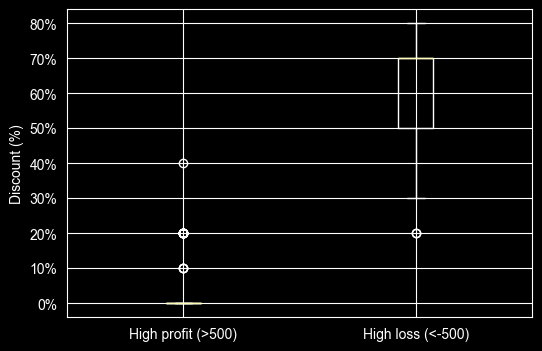

<br><br><p><span style="font-size: 1.2em;"><b>Fig. 2</b>: Discount differences between high-profit and high-loss orders</span></p>

Hypothesis test: Welch two-sample t-test
t-statistic = -21.416
p-value     = 0.0000
Sample sizes: n_high_profit = 117, n_high_loss = 50
Result: The difference is statistically significant (α = 0.05).


In [47]:
def plot_discount_groups():   
    high_profit = df[df['Profit'] > 500]
    high_loss   = df[df['Profit'] < -500]
    
    n_high_profit = len(high_profit)
    n_high_loss   = len(high_loss)

    t_stat, p_val = stats.ttest_ind(
        high_profit['Discount'],
        high_loss['Discount'],
        equal_var=False
    )

    plt.figure(figsize=(6,4))
    plt.boxplot([high_profit['Discount'], high_loss['Discount']],
                tick_labels=['High profit (>500)', 'High loss (<-500)'])
    ax = plt.gca()
    ax.set_ylabel('Discount (%)')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.show()

    display_title('Discount differences between high-profit and high-loss orders',
                  pref='Fig.', num=2)

    print("Hypothesis test: Welch two-sample t-test")
    print(f"t-statistic = {t_stat:.3f}")
    print(f"p-value     = {p_val:.4f}")
    print(f"Sample sizes: n_high_profit = {n_high_profit}, n_high_loss = {n_high_loss}")

    if p_val < 0.05:
        print("Result: The difference is statistically significant (α = 0.05).")
    else:
        print("Result: The difference is NOT statistically significant (α = 0.05).")


plot_discount_groups()

## Hypothesis 2: Sales amounts differ across product categories among high-profit orders

**Research question:**  
Do high-profit transactions (>500 profit) vary in sales performance across product categories?

**Null hypothesis (H0):**  
All categories have the same mean sales amount.

**Alternative hypothesis (H1):**  
At least one category differs.

**Test used:**  
One-way ANOVA.

**Business interpretation:**  
If categories differ significantly, this indicates structural differences in what types of high-profit items consumers buy.


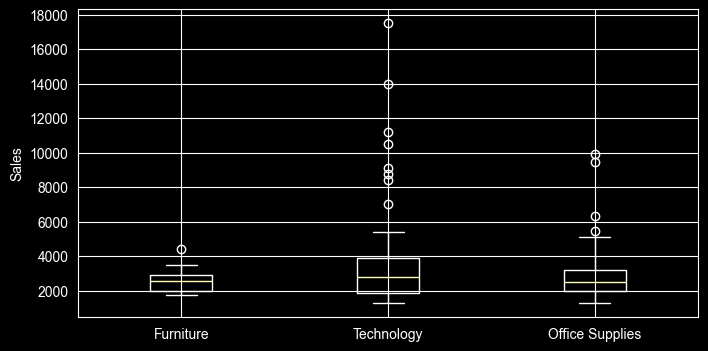

<br><br><p><span style="font-size: 1.2em;"><b>Fig. 3</b>: Sales differences between categories (Profit > 500)</span></p>

Hypothesis test: One-way ANOVA
F-statistic = 1.080
p-value     = 0.3432
Result: No statistically significant differences between categories.


In [48]:
def plot_category_sales():   
    hp = df[df['Profit'] > 500]
    
    cat_groups = [hp[hp['Category'] == cat]['Sales'] for cat in hp['Category'].unique()]
    f_stat, p_val = stats.f_oneway(*cat_groups)
    
    plt.figure(figsize=(8,4))
    plt.boxplot(cat_groups, tick_labels=hp['Category'].unique())
    plt.ylabel('Sales')
    plt.show()
    display_title('Sales differences between categories (Profit > 500)', pref='Fig.', num=3)

    print("Hypothesis test: One-way ANOVA")
    print(f"F-statistic = {f_stat:.3f}")
    print(f"p-value     = {p_val:.4f}")

    if p_val < 0.05:
        print("Result: There are statistically significant differences between categories.")
    else:
        print("Result: No statistically significant differences between categories.")

plot_category_sales()